In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#df = pd.read_json("resultados/results.jsonl", lines=True)
#df["resultado"] = df["match"].map({True: "Acerto", False: "Erro"})
#resumo = df.groupby("resultado").size()

#resumo.plot(kind="bar", color=["seagreen", "salmon"])
#plt.title("Gemini × Z3 – acertos vs erros")
#plt.ylabel("Quantidade")
#plt.show()




import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set_theme(style="whitegrid")


In [2]:
result_files = [
    ("resultados/results_gemini.jsonl", "Gemini"),
    ("resultados/results_gpt.jsonl", "GPT"),
]

frames = []
missing_files = []
for path, model in result_files:
    path_obj = Path(path)
    if not path_obj.exists():
        missing_files.append(path)
        continue
    df_temp = pd.read_json(path_obj, lines=True)
    df_temp["modelo"] = model
    frames.append(df_temp)

if not frames:
    raise FileNotFoundError(
        "Nenhum arquivo de resultados encontrado. Execute os scripts antes de gerar os gráficos."
    )

df = pd.concat(frames, ignore_index=True)
df["match"] = df["match"].astype(bool)
df["puzzle_file"] = df["puzzle_file"].fillna("desconhecido")

df.head()



import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set_theme(style="whitegrid")


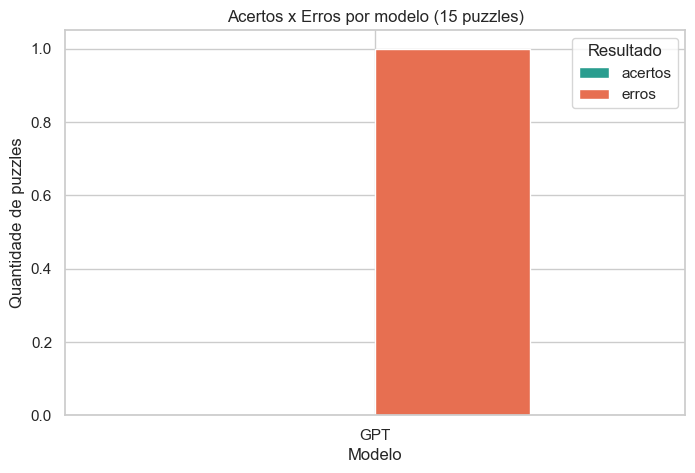

,acertos,total,erros
modelo,,,
GPT,0,1,1


In [3]:
resumo_modelos = (
    df.groupby("modelo")["match"]
    .agg(acertos="sum", total="count")
    .assign(erros=lambda s: s["total"] - s["acertos"])
)

ax = resumo_modelos[["acertos", "erros"]].plot(
    kind="bar",
    figsize=(8, 5),
    color=["#2a9d8f", "#e76f51"],
)
ax.set_title("Acertos x Erros por modelo (15 puzzles)")
ax.set_ylabel("Quantidade de puzzles")
ax.set_xlabel("Modelo")
ax.legend(title="Resultado")
plt.xticks(rotation=0)
plt.show()

resumo_modelos



/tmp/ipykernel_8317/1857642576.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  plot_df = matriz.replace({True: 1, False: 0, None: float("nan")})


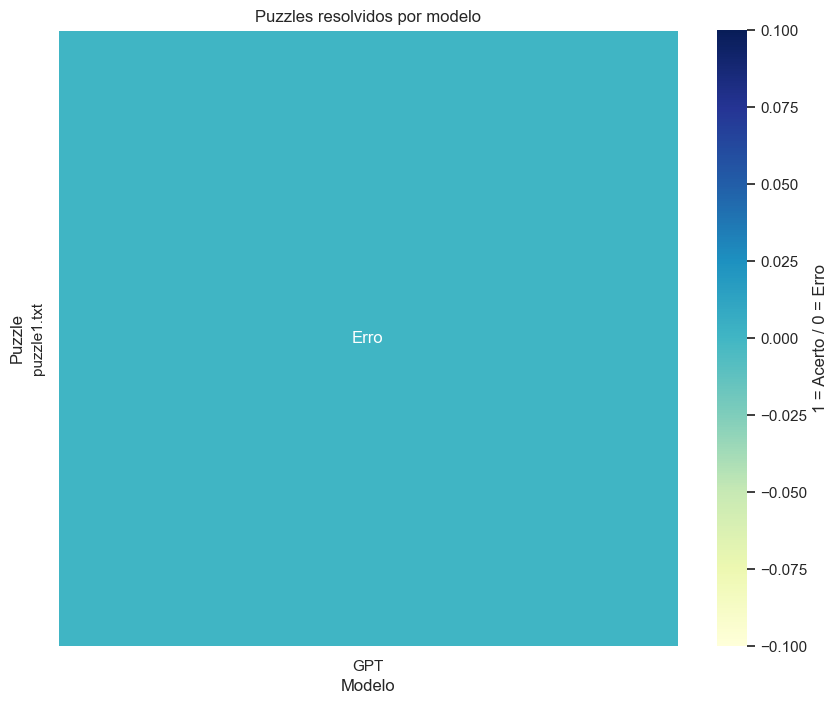

modelo,GPT
puzzle_file,
puzzle1.txt,False


In [4]:
matriz = (
    df.pivot_table(
        index="puzzle_file",
        columns="modelo",
        values="match",
        aggfunc="first",
    )
    .sort_index()
)

plot_df = matriz.replace({True: 1, False: 0, None: float("nan")})
annot = matriz.replace({True: "Acerto", False: "Erro", None: ""})

plt.figure(figsize=(10, 8))
sns.heatmap(
    plot_df,
    annot=annot,
    fmt="",
    cmap="YlGnBu",
    cbar_kws={"label": "1 = Acerto / 0 = Erro"},
    linewidths=0.5,
    linecolor="white",
)
plt.title("Puzzles resolvidos por modelo")
plt.ylabel("Puzzle")
plt.xlabel("Modelo")
plt.show()

matriz



In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set_theme(style="whitegrid")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#df = pd.read_json("resultados/results.jsonl", lines=True)
#df["resultado"] = df["match"].map({True: "Acerto", False: "Erro"})
#resumo = df.groupby("resultado").size()

#resumo.plot(kind="bar", color=["seagreen", "salmon"])
#plt.title("Gemini × Z3 – acertos vs erros")
#plt.ylabel("Quantidade")
#plt.show()




result_files = [
    ("resultados/results_gemini.jsonl", "Gemini"),
    ("resultados/results_gpt.jsonl", "GPT"),
]

frames = []
missing_files = []
for path, model in result_files:
    path_obj = Path(path)
    if not path_obj.exists():
        missing_files.append(path)
        continue
    df = pd.read_json(path_obj, lines=True)
    df["modelo"] = model
    frames.append(df)

if not frames:
    raise FileNotFoundError("Nenhum arquivo de resultados encontrado. Execute os scripts antes de gerar os gráficos.")

df = pd.concat(frames, ignore_index=True)
df["match"] = df["match"].astype(bool)

if missing_files:
    print("Arquivos ausentes:", ", ".join(missing_files))

df.head()


Arquivos ausentes: resultados/results_gemini.jsonl


,timestamp,puzzle_file,puzzle_text,llm_answer,z3_answer,match,model,modelo
0,2025-11-22 16:50:48.934576,puzzle1.txt,Em uma ilha vivem apenas cavaleiros e patifes....,Vamos resolver o problema de forma lógica prim...,"{'A': False, 'B': True}",False,gpt-4o-mini,GPT
